# Churn Analysis (Data Science Project)

# 1. Import relevant libraries

In [ ]:
# Step 1: Import relevant libraries---------------------------------------------------------

#Standard libraries for data analysis:----------------------

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew

# sklearn modules for data preprocessing-------------------------------------

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

#sklearn modules for Model Selection--------------------------------------

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#sklearn modules for Model Evaluation & Improvement---------------------------

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score, GridSearchCV, ShuffleSplit, KFold


#Standard libraries for data visualization---------------------

import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix

#Miscellaneous Utilitiy Libraries--------------------------------------


# 2. Set Up the current working directory & Import Dataset

In [ ]:
# Step 2: Import the dataset
dataset = pd.read_csv('customer_churn_data.csv')

#Step 3: Read Dataset
dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# 3. Evaluate Data Structure

In [ ]:
# Step 4: Evaluate data structure
dataset.shape

(7043, 21)

In [ ]:
#Check Unique Values
df_columns = dataset.columns.tolist()
for col in df_columns:
  print(col, "Unique values: ", dataset[col].unique())

customerID Unique values:  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender Unique values:  ['Female' 'Male']
SeniorCitizen Unique values:  [0 1]
Partner Unique values:  ['Yes' 'No']
Dependents Unique values:  ['No' 'Yes']
tenure Unique values:  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService Unique values:  ['No' 'Yes']
MultipleLines Unique values:  ['No phone service' 'No' 'Yes']
InternetService Unique values:  ['DSL' 'Fiber optic' 'No']
OnlineSecurity Unique values:  ['No' 'Yes' 'No internet service']
OnlineBackup Unique values:  ['Yes' 'No' 'No internet service']
DeviceProtection Unique values:  ['No' 'Yes' 'No internet service']
TechSupport Unique values:  ['No' 'Yes' 'No internet service']
StreamingTV Unique values:  ['No' 'Yes' 'No internet service']


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
#Recheck Column Datatypes and Missing Values:
null_column = [column for column in dataset.columns if dataset[column].isnull().sum()>1]
null_column

[]

In [ ]:
data_null = dataset[dataset["tenure"] == 0]
data_null

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
#Percentage of missing values
print(round(data_null["TotalCharges"].count()/dataset["TotalCharges"].count(),4)*100,"%")

0.16 %




*   Terdapat 11 baris dengan TotalCharges kosong
*   Seluruh missing values memiliki Tenure 0
*   Missing values hanya 0.16% daripada seluruh data. Data ini bisa kita drop karena tidak cukup informasi.





In [ ]:
#Drop missing data (Cara 1)
dataset[dataset["tenure"] == 0].reset_index(drop=True)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
1,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
2,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
3,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
4,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
5,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
6,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
7,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
8,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
9,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
#Convert to NaN
dataset[dataset["TotalCharges"] == " "] = np.nan

In [ ]:
dataset.dropna(inplace=True)

In [ ]:
dataset.shape

(7032, 21)

In [ ]:
#Convert TotalCharges from object to float
dataset["TotalCharges"] = dataset["TotalCharges"].astype(float)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   float64
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   float64
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

# 4. Check Target Variable Distribution

In [ ]:
#Step 5: Check Target Variable Distribution -----------------------------------------------
dataset["Churn"].value_counts()

,count
Churn,
No,5163
Yes,1869


What happen here?

Answer: Yang Churning sedikit. Datanya tidak seimbang dimana data menunjukkan kebanyakan tidak churning (no) sehingga kurang bagus untuk digunakan dalam proses prediksi.
Data yang tidak seimbang terlihat pada visualisasi berikut ini :

Text(0.5, 1.0, 'Churn')

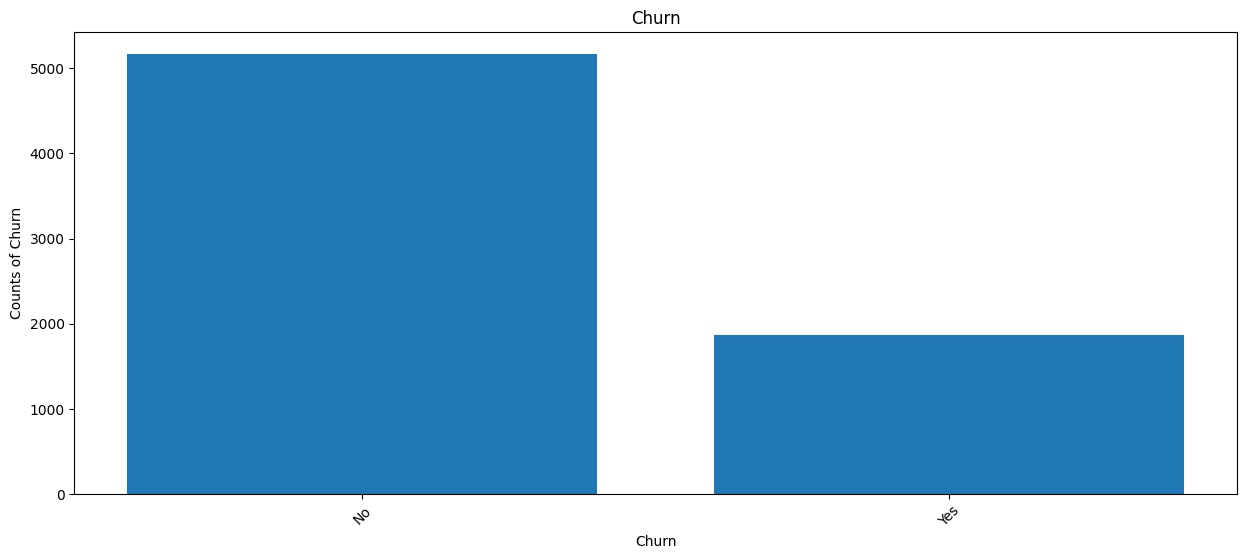

In [ ]:
#Visualisasi Class Imbalance (Bar chart)
plt.figure(figsize=(15,6))

#Calculate Counts
Churn_count=dataset["Churn"].value_counts()

#define bar labels
bar_labels=Churn_count.index.to_list()

#create a bar chart
plt.bar(bar_labels,Churn_count)

#add title and axis labels
plt.xticks(rotation=45)
plt.xlabel('Churn')
plt.ylabel('Counts of Churn')
plt.title('Churn')

# 5. Analysis Predictor column

## 1. Customer Info Analysis

In [ ]:
import seaborn as sns
from matplotlib import *

In [ ]:
SC = dataset["SeniorCitizen"].map({0: "No", 1: "Yes"}) #tidak dipakai

<ipython-input-20-9b52f7911620>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,2,i+1)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple t

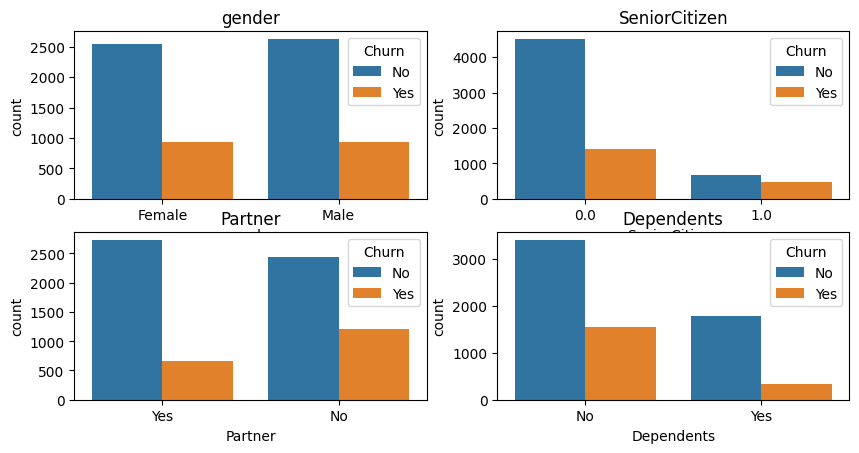

In [ ]:
df_check = dataset[['gender', 'SeniorCitizen', 'Partner', 'Dependents']]
fig = plt.figure(figsize=(10,10))
plt.title("Customer Info Analysis", horizontalalignment = "center")
for i in range(df_check.shape[1]):
  plt.subplot(4,2,i+1)
  f = sns.countplot(df_check, x = df_check.columns[i], hue=dataset["Churn"])
  f.set_title(df_check.columns.values[i])

plt.show()

Insight dari Visualisasi diatas adalah


*   Gender tidak memiliki pengaruh signifikan terhadap tingkat churn
*   SeniorCitizen, Partner, dan Dependents memiliki pengaruh terhadap tingkat churn.
  
  * Citizen yang lebih muda cenderung lebih banyak churn
  * Customer yang tidak memiliki partner cenderung lebih banyak churn
  * Customer tidak dependents cenderung lebih banyak churn



## 2. Service Analysis

<ipython-input-21-e99f0b55aa93>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,2,i+1)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple t

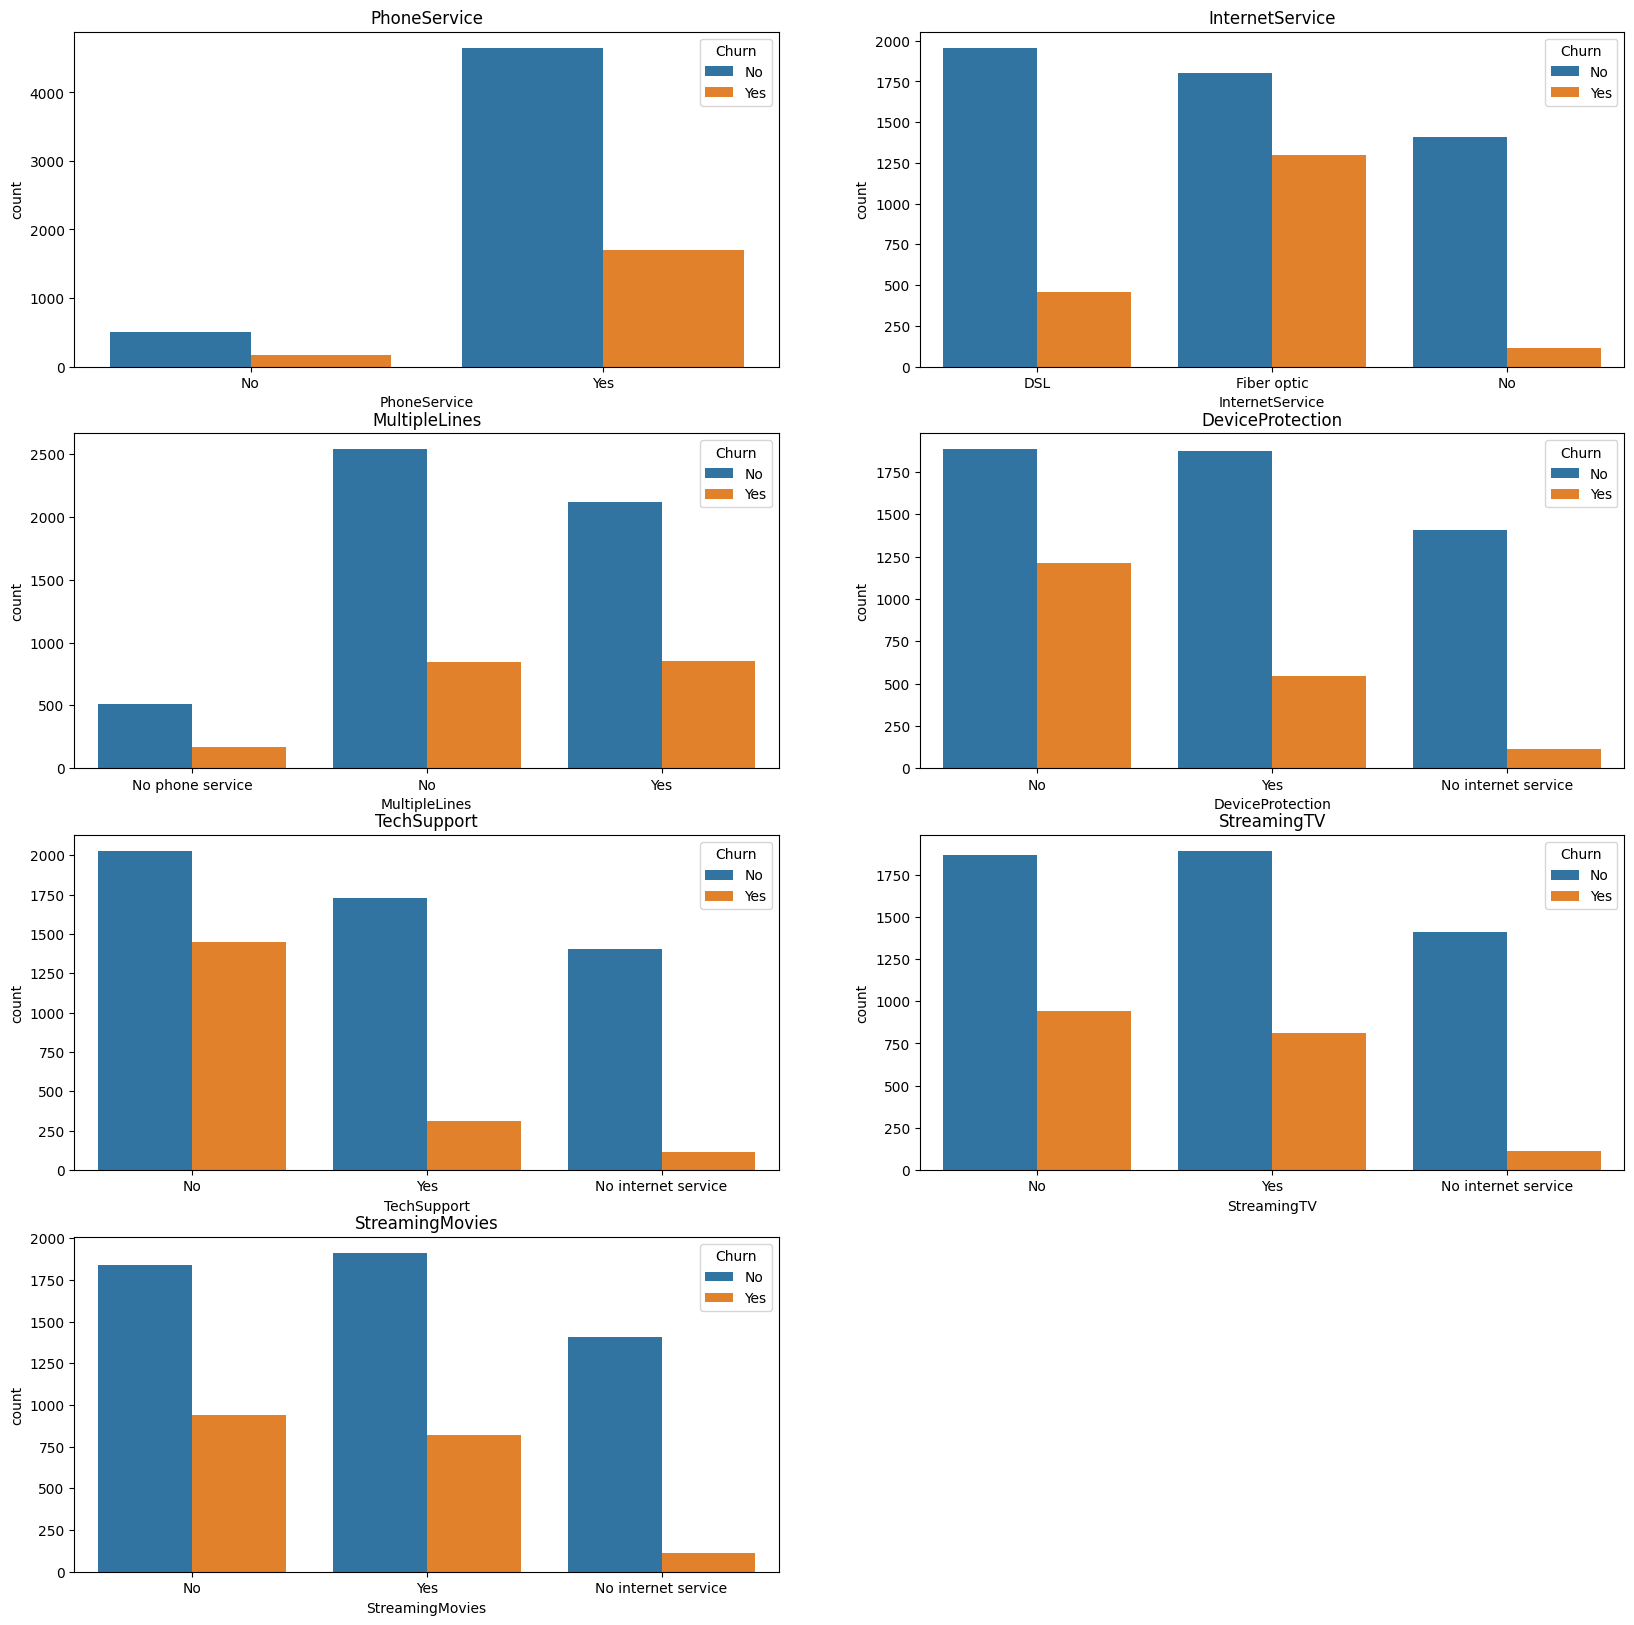

In [ ]:
df_check2 = dataset[["PhoneService", "InternetService", "MultipleLines", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]]
fig = plt.figure(figsize=(20,20))
plt.title("Service Info Analysis", horizontalalignment = "center")
for i in range(df_check2.shape[1]):
  plt.subplot(4,2,i+1)
  f = sns.countplot(df_check2, x = df_check2.columns[i], hue=dataset["Churn"])
  f.set_title(df_check2.columns.values[i])

plt.show()

Insight dari Visualisasi diatas menunjukkan bahwa service yang dilakukan
 cukup berpengaruh terhadap tingkat churn, dimana pengaruhnya adalah sebagai berikut :


*   PhoneService cukup mempengaruhi terhadap tingkat churn. yang telah melakukan phoneservice cenderung lebih banyak churn.
*   Internet service dengan tipe FiberOptic cenderung lebih banyak churn.
* yang tidak ada device protection, tidak melakukan techsupport, tidak streaming TV, dan tidak streamingmovies cenderung lebih banyak churn.
* sedangkan untuk multiplelines tidak ada pengaruh yang signifikan terhadap status churn.



## 3. Payment Analysis

<ipython-input-22-a89cccc1fcef>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,2,i+1)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple t

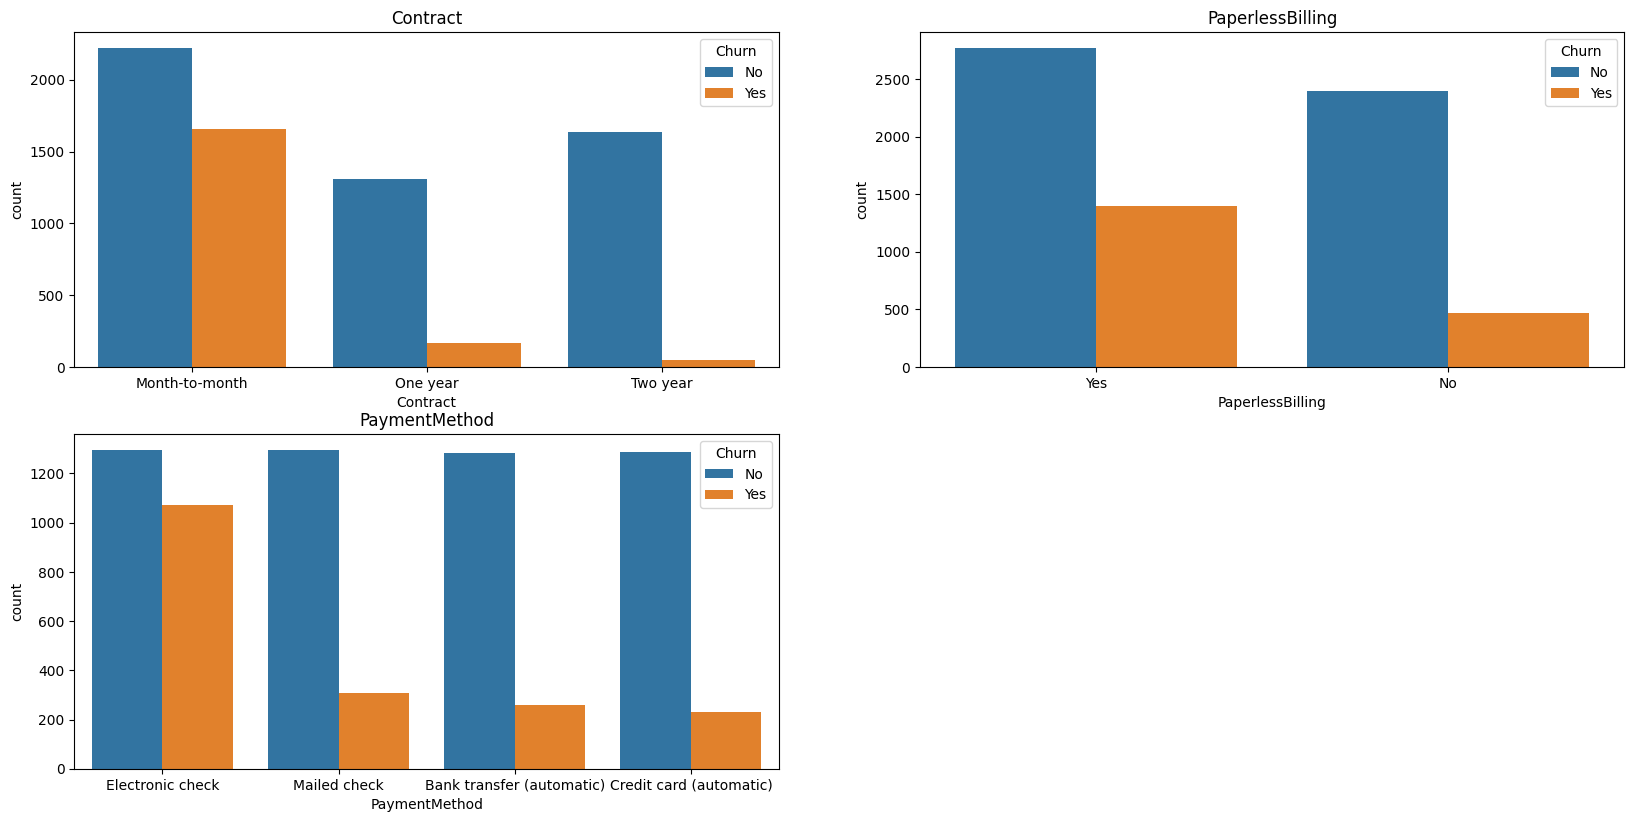

In [ ]:
df_check3 = dataset[["Contract", "PaperlessBilling", "PaymentMethod"]]
fig = plt.figure(figsize=(20,20))
plt.title("Payment Info Analysis", horizontalalignment = "center")
for i in range(df_check3.shape[1]):
  plt.subplot(4,2,i+1)
  f = sns.countplot(df_check3, x = df_check3.columns[i], hue=dataset["Churn"])
  f.set_title(df_check3.columns.values[i])

plt.show()

Insight dari Visualisasi diatas menunjukkan bahwa hal yang berkaitan dengan payment sangat berpengaruh terhadap tingkat Churn, sebagai berikut :

*   Customer yang terikat contract lebih lama akan cenderung tidak churn, sedangkan contract singkat (month-to-month) cenderung memiliki tingkat churn yang tinggi.
*   Paperless Billing berdampak pada tingkat churn yang lebih tinggi
* Payment method menggunakan electronic check memiliki tingkat churn yang paling tinggi.



## 4. Check Outliers

<ipython-input-23-924db2bdb67c>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, i + 1)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


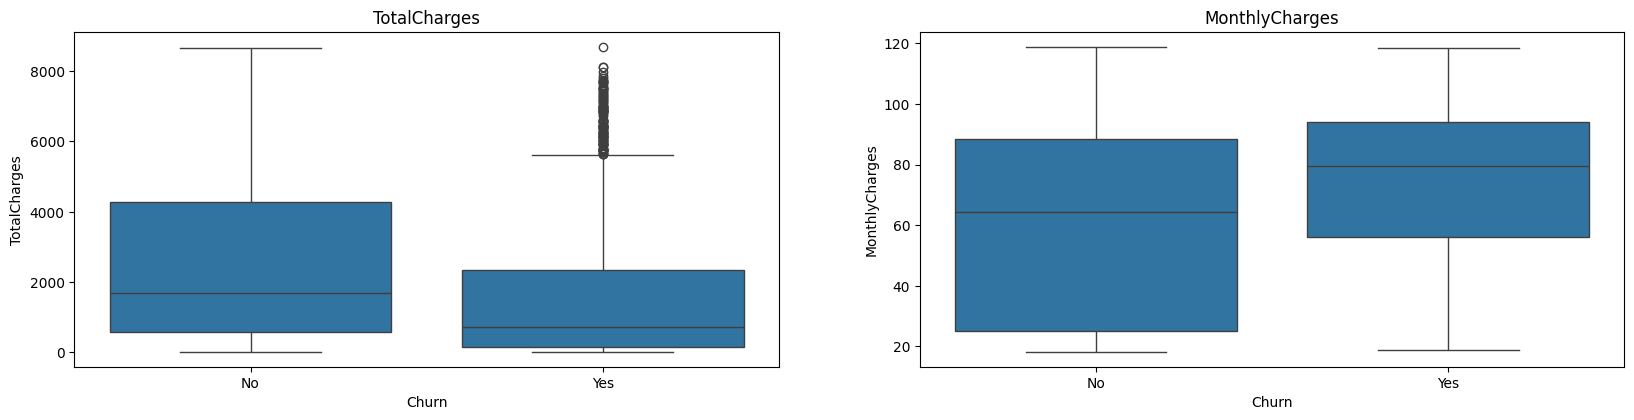

In [ ]:
df_check4 = dataset[["TotalCharges", "MonthlyCharges"]]
fig = plt.figure(figsize=(20, 20))
plt.title("Info Analysis", horizontalalignment="center")

for i in range(df_check4.shape[1]):
    plt.subplot(4, 2, i + 1)
    f = sns.boxplot(y=df_check4.columns[i], x=dataset["Churn"], data=dataset)
    f.set_title(df_check4.columns.values[i])

plt.show()

Insight dari Visualisasi telihat bahwa terdapat outliers pada Total Charges.

Sehingga untuk model selection nantinya menggunakan ROC-AUC untuk memilih best model nya.

# 6. Prepare the Dataset

## Label Encoding

In [ ]:
le = []
for col in dataset.columns[1:]:
  if dataset[col].dtype == "object":
    if len(list(dataset[col].unique())) <= 2:
      le.append(col)

In [ ]:
le.append("MultipleLines")
# le.append("PhoneService")
le.append("OnlineSecurity")
le.append("OnlineBackup")
le.append("DeviceProtection")
le.append("TechSupport")
le.append("StreamingTV")
le.append("StreamingMovies")

In [ ]:
le

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [ ]:
le.remove("gender")

In [ ]:
def label_encoding(df, features):
  for i in features:
    df[i] = df[i].map({"Yes": 1, "No": 0, "No internet service":0, "No phone service": 0})
  return df

df = label_encoding(dataset, le)
df["gender"] = dataset["gender"].map({"Female": 0, "Male": 1})

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0.0,1,0,1.0,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0.0,0,0,34.0,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0.0,0,0,2.0,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0.0,0,0,45.0,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0.0,0,0,2.0,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


## One Hot Encoding

In [ ]:
ohc = ["InternetService","Contract", "PaymentMethod"]
df_one_hot = pd.get_dummies(df, columns=ohc)

In [ ]:
#Drop CustomerID
df_one_hot = df_one_hot.drop(columns=["customerID"])
#Drop Phone Service
# df_one_hot = df_one_hot.drop(columns=["PhoneService"])

In [ ]:
df_one_hot.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.0,1,0,1.0,0,0,0,1,0,0,0,0,1,29.85,29.85,0,True,False,False,True,False,False,False,False,True,False
1,1,0.0,0,0,34.0,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,True,False,False,False,True,False,False,False,False,True
2,1,0.0,0,0,2.0,1,0,1,1,0,0,0,0,1,53.85,108.15,1,True,False,False,True,False,False,False,False,False,True
3,1,0.0,0,0,45.0,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,True,False,False,False,True,False,True,False,False,False
4,0,0.0,0,0,2.0,1,0,0,0,0,0,0,0,1,70.70,151.65,1,False,True,False,True,False,False,False,False,True,False


# 7. Split Dataset into Dependent and Independent Variables

In [ ]:
from collections import Counter

In [ ]:
X = df_one_hot.drop(columns="Churn")
y = df_one_hot["Churn"]
counter = Counter(y)
print(counter)

Counter({0: 5163, 1: 1869})


# 8. Generate training and test datasets of dependent and independent variables


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state=0)
print("Before Sampling: ", Counter(y_train))

Before Sampling:  Counter({0: 4130, 1: 1495})


# SMOTE / Oversampling

In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
#Check Churn Distribution
Churn_dist = df['Churn'].value_counts()

print(Churn_dist)
print("\n\tChurn 0: {:0.2f}%".format(Churn_dist[0]/ (Churn_dist[0] + Churn_dist[1])))
print("\n\tChurn 1: {:0.2f}%".format(Churn_dist[1]/ (Churn_dist[0]+Churn_dist[1])))


Churn
0    5163
1    1869
Name: count, dtype: int64

	Churn 0: 0.73%

	Churn 1: 0.27%


In [ ]:
# X sebagai prediktor dan y sebagai label
X = df_one_hot.drop(columns="Churn")
y = df_one_hot["Churn"]

In [ ]:
# Split data ke train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state=42)

# Cek distribusi label pada y_train
print(f"Data sebelum SMOTE: {Counter(y_train)}")

Data sebelum SMOTE: Counter({0: 4130, 1: 1495})


In [ ]:
#after split pake kode ini untuk smotenya
X_train_smote, y_train_smote = SMOTE(random_state=0).fit_resample(X_train, y_train)

print("After Sampling: ", Counter(y_train_smote))

After Sampling:  Counter({0: 4130, 1: 4130})


In [ ]:
# install the libraries
# !pip install imblearn

#use the SMOTE module from imblearn
print("\n\t Pre Oversampling, counts of label '1': {}".format(sum(y_train == 1)))
print("\n\t Pre Oversampling, counts of label '0': {}".format(sum(y_train == 0)))

# import SMOTE for sampling
# from imblearn.over_sampling import SMOTE

# sm = SMOTE(sampling_strategy = 0.3, k_neighbors = 5, random_state = 100)
# X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

# Print the oversampling results
print("\n\t Post OverSampling, the shape of  train_X: {}".format(X_train_smote.shape))
print("\n\t Post OverSampling, the shape of train_y: {}".format(y_train_smote.shape))

print("\n\t Post OverSampling, label count '1': {}".format(sum(y_train_smote == 1)))
print("\n\t Post OverSampling, label count '0': {}".format(sum(y_train_smote == 0)))


	 Pre Oversampling, counts of label '1': 1495

	 Pre Oversampling, counts of label '0': 4130

	 Post OverSampling, the shape of  train_X: (8260, 26)

	 Post OverSampling, the shape of train_y: (8260,)

	 Post OverSampling, label count '1': 4130

	 Post OverSampling, label count '0': 4130


# 9. Feature Scaling

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train_smote_scaled = scaler.fit_transform(X_train_smote)

X_test_scaled = scaler.fit_transform(X_test)

# 10. Model Selection

model nya masih yg before smote, lakukan hal yg sama untuk data after smote

In [ ]:
## Sebelum SMOTE
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,
                                                         class_weight='balanced')))
# Other models
models.append(('RandomForest', RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 3)))
models.append(('SVC', SVC(random_state = 0)))
models.append(('DecisionTree', DecisionTreeClassifier(random_state = 0)))
models.append(('GaussianNB', GaussianNB()))

#Evaluating Model Results:
acc_results = []
auc_results = []
names = []

col = ["Algorithm", "ROC-AUC Mean", "Accuracy Mean"]
model_results = pd.DataFrame(columns=col)

from sklearn import model_selection
i=0
for name,model in models:
  kfold = model_selection.KFold(n_splits=3)
  cv_auc_results = model_selection.cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring="roc_auc")
  cv_acc_results = model_selection.cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring="accuracy")
  auc_results.append(cv_auc_results)
  acc_results.append(cv_acc_results)
  names.append(name)
  model_results.loc[i] = [name, round(cv_auc_results.mean()*100,2),
                          round(cv_acc_results.mean()*100,2)]
  i+=1
model_results.sort_values(by=["ROC-AUC Mean"], ascending=False)
#Cek apakah ada outlier atau tidak (Jika ada outlier/masih too imbalance maka patokan ROC-AUC, jika tidak ada bisa menggunakan accuracy)
# Terdapat banyak outlier pada data TotalCharges kategori Churn 'Yes' sehingga menggunakan ROC-AUC sebagai patokan

,Algorithm,ROC-AUC Mean,Accuracy Mean
0,Logistic Regression,84.66,75.29
5,GaussianNB,83.39,75.11
1,RandomForest,82.99,79.04
3,SVC,80.18,79.72
2,KNN,74.35,75.04
4,DecisionTree,65.89,72.62


In [ ]:
## Setelah SMOTE
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,
                                                         class_weight='balanced')))
# Other models
models.append(('RandomForest', RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 3)))
models.append(('SVC', SVC(random_state = 0)))
models.append(('DecisionTree', DecisionTreeClassifier(random_state = 0)))
models.append(('GaussianNB', GaussianNB()))

#Evaluating Model Results:
acc_results = []
auc_results = []
names = []

col = ["Algorithm", "ROC-AUC Mean", "Accuracy Mean"]
model_results = pd.DataFrame(columns=col)

from sklearn import model_selection
i=0
for name,model in models:
  kfold = model_selection.KFold(n_splits=3)
  cv_auc_results = model_selection.cross_val_score(model, X_train_smote_scaled, y_train_smote, cv=kfold, scoring="roc_auc")
  cv_acc_results = model_selection.cross_val_score(model, X_train_smote_scaled, y_train_smote, cv=kfold, scoring="accuracy")
  auc_results.append(cv_auc_results)
  acc_results.append(cv_acc_results)
  names.append(name)
  model_results.loc[i] = [name, round(cv_auc_results.mean()*100,2),
                          round(cv_acc_results.mean()*100,2)]
  i+=1
model_results.sort_values(by=["ROC-AUC Mean"], ascending=False)
#Cek apakah ada outlier atau tidak (Jika ada outlier/masih too imbalance maka patokan ROC-AUC, jika tidak ada bisa menggunakan accuracy)
# Terdapat banyak outlier pada data TotalCharges kategori Churn 'Yes' sehingga menggunakan ROC-AUC sebagai patokan

,Algorithm,ROC-AUC Mean,Accuracy Mean
1,RandomForest,87.15,74.04
0,Logistic Regression,85.02,80.74
3,SVC,84.26,70.59
5,GaussianNB,83.87,77.42
2,KNN,80.98,71.08
4,DecisionTree,72.14,72.09


In [ ]:
## Cross Validation Test Dataset
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,
                                                         class_weight='balanced')))
# Other models
models.append(('RandomForest', RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 3)))
models.append(('SVC', SVC(random_state = 0)))
models.append(('DecisionTree', DecisionTreeClassifier(random_state = 0)))
models.append(('GaussianNB', GaussianNB()))

#Evaluating Model Results:
acc_results = []
auc_results = []
names = []

col = ["Algorithm", "ROC-AUC Mean", "Accuracy Mean"]
model_results = pd.DataFrame(columns=col)

from sklearn import model_selection
i=0
for name,model in models:
  kfold = model_selection.KFold(n_splits=3)
  cv_auc_results = model_selection.cross_val_score(model, X_test_scaled, y_test, cv=kfold, scoring="roc_auc")
  cv_acc_results = model_selection.cross_val_score(model, X_test_scaled, y_test, cv=kfold, scoring="accuracy")
  auc_results.append(cv_auc_results)
  acc_results.append(cv_acc_results)
  names.append(name)
  model_results.loc[i] = [name, round(cv_auc_results.mean()*100,2),
                          round(cv_acc_results.mean()*100,2)]
  i+=1
model_results.sort_values(by=["ROC-AUC Mean"], ascending=False)
#Cek apakah ada outlier atau tidak (Jika ada outlier/masih too imbalance maka patokan ROC-AUC, jika tidak ada bisa menggunakan accuracy)
# Terdapat banyak outlier pada data TotalCharges kategori Churn 'Yes' sehingga menggunakan ROC-AUC sebagai patokan

,Algorithm,ROC-AUC Mean,Accuracy Mean
0,Logistic Regression,82.95,72.00
1,RandomForest,82.75,77.68
5,GaussianNB,81.75,72.92
3,SVC,80.78,78.82
2,KNN,75.16,74.84
4,DecisionTree,65.99,73.42


Prediction_Score_Test 0.7256574271499645
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407



<Axes: >

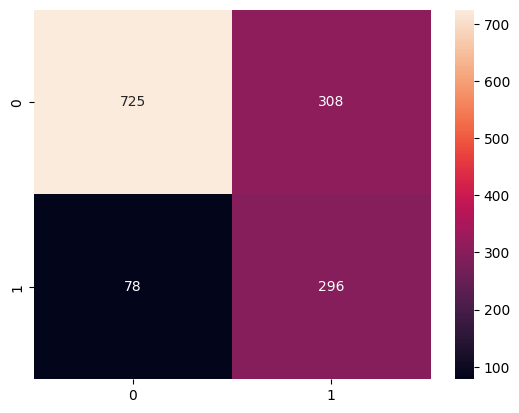

In [ ]:
from sklearn.metrics import classification_report

#evaluate the results without SMOTE as well as with SMOTE.
First_model = LogisticRegression(solver='liblinear', random_state = 0,
                                                         class_weight='balanced')
First_model.fit(X_train_scaled,y_train)
Deter = First_model.predict(X_test_scaled)

print("Prediction_Score_Test",accuracy_score(y_test,Deter))
print(classification_report(y_test,Deter))

sns.heatmap(confusion_matrix(y_test,Deter), annot = True,fmt ='g')

Prediction_Score_Test 0.7853589196872779
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.45      0.53       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.69      1407
weighted avg       0.77      0.79      0.77      1407



<Axes: >

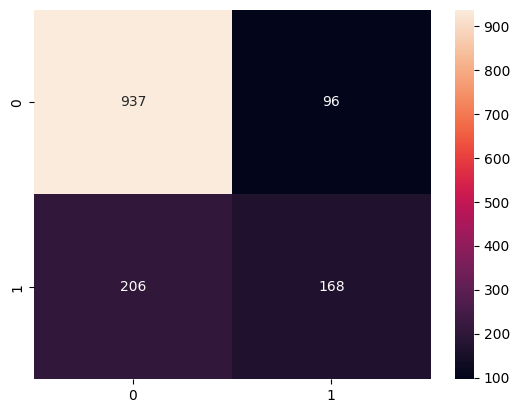

In [ ]:
from sklearn.metrics import classification_report

#evaluate the results without SMOTE as well as with SMOTE.
First_model = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=0)
First_model.fit(X_train_scaled,y_train)
Deter = First_model.predict(X_test_scaled)

print("Prediction_Score_Test",accuracy_score(y_test,Deter))
print(classification_report(y_test,Deter))

sns.heatmap(confusion_matrix(y_test,Deter), annot = True,fmt ='g')

Predicting_Score 0.5998578535891969
              precision    recall  f1-score   support

           0       0.96      0.48      0.64      1033
           1       0.39      0.94      0.55       374

    accuracy                           0.60      1407
   macro avg       0.67      0.71      0.60      1407
weighted avg       0.81      0.60      0.61      1407



<Axes: >

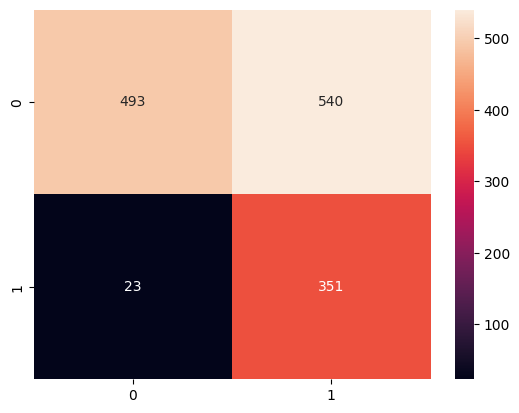

In [ ]:
#Results of SMOTE
Inr = LogisticRegression(solver='liblinear', random_state = 0,
                                                         class_weight='balanced')
Inr.fit(X_train_smote_scaled, y_train_smote)
predictions =Inr.predict(X_test_scaled)

# print the outcomes of SMOTE
print("Predicting_Score",accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions))
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, fmt='g')

Predicting_Score 0.7242359630419332
              precision    recall  f1-score   support

           0       0.89      0.72      0.79      1033
           1       0.49      0.75      0.59       374

    accuracy                           0.72      1407
   macro avg       0.69      0.73      0.69      1407
weighted avg       0.78      0.72      0.74      1407



<Axes: >

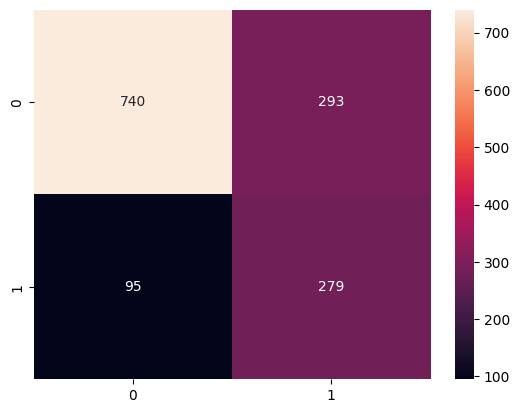

In [ ]:
#Results of SMOTE
Inr = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=0)
Inr.fit(X_train_smote_scaled, y_train_smote)
predictions =Inr.predict(X_test_scaled)

# print the outcomes of SMOTE
print("Predicting_Score",accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions))
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, fmt='g')

model mana yang dipilih dan mengapa?

# model yang dipilih adalah Logistic Regression, karena memiliki ROC-AUC tertinggi yang berarti performanya paling baik dalam menangani kelas churn yang imbalance. Alasan ROU-AUC menjadi patokan di sini karena data churn cenderung tidak seimbang, metrik akurasi mungkin tidak sepenuhnya mencerminkan performa model. Akurasi bisa tinggi meskipun model tidak mampu memprediksi dengan baik kelas minoritas. ROC-AUC, sebaliknya, mengukur kemampuan model dalam membedakan antara kelas positif dan negatif, yang sangat penting untuk kasus churn.


